# Natural Language processing for Customer reviews for Hotels
## Trip Advisor Location: British Columbia 
## City Code: 154922
Project Scope: Review positive and negative reviews and attribute them to specific reasons for the reviews to better understand the nature of the hotel and the reason for sentiment. 

In [1]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [88]:
!pip install plotly

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 11.5MB 3.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/44/ef/beae4b4ef80902f22e3af073397f079c96969c69b2c7d52a57ea9ae61c9d/retrying-1.3.3.tar.gz
  Created wheel for retrying: filename=retrying-1.3.3-cp27-none-any.whl size=11430 sha256=958cac84c2da87f594f72aedf6fcbe341f1f0186d054f1ccbf024c78f6787abb
  Stored in directory: /Users/krutheekarajkumar/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/Library/Python/2.7/site-packa

In [145]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import pylab
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np
import itertools

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator
import csv

#Natural Language Processing Packages
import re
import nltk


## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/krutheekarajkumar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krutheekarajkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/krutheekarajkumar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krutheekarajkumar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Computing the average Vader sentiment and the average groun truth rating per hotel. 
NLTK sentiment analysis package (vader) used in conjecture with NLTK library. NLTK libraries allow for tokenization, parsing, classification, tagging. The library is primarily written in Python and therefore is easier to implement into this project. 

In [3]:
file = "reviews2.csv"

In [4]:
with open(file, 'r',encoding='ascii') as f:
    reader = csv.reader(f)
    review = list(reader)

In [5]:
reviews_df = pd.read_csv(file, names=['Link', 'Hotel_Name', 'Review text', 'Ratings', 'Experience'], delimiter=',')
reviewlist = []
hotellist = []

for index,review in enumerate(reviews_df['Review text']):
    reviewlist.append(re.sub(r'&\w+;','',review))
     
for hotel in reviews_df['Hotel_Name']:
    hotellist.append(re.sub(r'&.*;','',hotel))
    

reviews_df['Review text'] = reviewlist
reviews_df['Hotel_Name'] = hotellist
#reviews_df.columns('Link','Hotel Name','Review text','Ratings','Experience')
print("Number of reviews: ",reviews_df.shape[0])
      

Number of reviews:  4059


In [6]:
x = reviews_df['Hotel_Name'].unique()
print("Number of hotels being reviewed: ", len(x))

Number of hotels being reviewed:  78


<b> Function evalSentences: </b>Each of the Reviews were given three scores based on how positive, neutral or negative they were, these were compounded using the NLTK's polarity function. The values were then written into a dataframe which included the text of the review as well as the score associate with it for further analysis.<br>
The sentences are iterated through to and checked against the SentiText lexicon rule-based sentiment_valence funtion to assign a valance score to the sentiment. The sum of the computed valance scored are then passed to 

In [7]:
def evalSentences(sentences, to_df=False):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in sentences:
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = ["Review", "Compound_Score"]
        return reviewDf
    
    else:
        for sentence in sentences:
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']]+
                         [ss['pos']]+[ss['neg']]+[ss['neu']])    
        reviewDfall = pd.DataFrame(pdlist)
        reviewDfall.columns = ["Review", "Compound_Score", "Positive", 
                           "Negative", "Neutral"]
        return reviewDfall

In [8]:
all_vader_sentiment_scores_DF= evalSentences(reviews_df['Review text'])
all_vader_sentiment_scores_DF[:5]
compound_vader_sentiment_scores_DF = evalSentences(reviews_df['Review text'].values, to_df=True)

In [9]:
compound_vader_sentiment_scores_DF = pd.concat([compound_vader_sentiment_scores_DF, reviews_df["Experience"]], axis=1)
review_vader_exp_name_DF = pd.concat([compound_vader_sentiment_scores_DF, reviews_df['Hotel_Name']], axis=1)

In [146]:
#reviewDF[reviewDF['Hotel_Name'] == 'Stansbury&#39;s Guest House']
review_vader_exp_name_DF [:5]

,Review,Compound_Score,Experience,Hotel_Name
0,"""I was looking for a place to sit and chill fo...",0.8442,positive,The Riding Fool Hostel
1,"""I stayed at the Riding Fool Hostel whilst I w...",0.9965,positive,The Riding Fool Hostel
2,"""My husband and I (both in our 50\\'s) stayed ...",0.9757,positive,The Riding Fool Hostel
3,"""We were warmly welcomed by Caitlin, the new ...",0.9766,positive,The Riding Fool Hostel
4,"""Comfortable, cheap, and cosy accommodation wi...",0.4939,positive,The Riding Fool Hostel


<b> Statistics based on binary feedback: </b> All the reviews have an experience column that is binary (positive or negative), assigning a numeric value (in this case 0 and 1) will give a higher level understanding of the performances of hotels in that region as a whole.

In [11]:
exp = review_vader_exp_name_DF['Experience']
exp_list = []
for e in exp:
    if e == 'positive':
        exp_list.append(1)
    else:
        exp_list.append(0)

In [12]:
exp_df = pd.DataFrame(exp_list,columns=['Exp_Index'])
compound_vader_sentiment_scores_DF = pd.concat([review_vader_exp_name_DF, exp_df], axis=1)
compound_vader_sentiment_scores_DF.head()

,Review,Compound_Score,Experience,Hotel_Name,Exp_Index
0,"""I was looking for a place to sit and chill fo...",0.8442,positive,The Riding Fool Hostel,1
1,"""I stayed at the Riding Fool Hostel whilst I w...",0.9965,positive,The Riding Fool Hostel,1
2,"""My husband and I (both in our 50\\'s) stayed ...",0.9757,positive,The Riding Fool Hostel,1
3,"""We were warmly welcomed by Caitlin, the new ...",0.9766,positive,The Riding Fool Hostel,1
4,"""Comfortable, cheap, and cosy accommodation wi...",0.4939,positive,The Riding Fool Hostel,1


In [13]:
# Grouping by hotel name to understand the average review of each of the hotel and the number of reviews for them
# The "reviewCol" column is used to denote the number of reviews for each of the hotels
hotel_performance = compound_vader_sentiment_scores_DF.groupby('Hotel_Name').mean()
count = compound_vader_sentiment_scores_DF.groupby('Hotel_Name').count()

print("Over all statistics of all hotel performances:")
print(hotel_performance.describe())
print("__________________________________")
print("The average vader rating grouped by hotel is: ")
print(hotel_performance.head())
print("__________________________________")
print("The number of reviews grouped by hotels are: ")
print(count['Review'].head())



Over all statistics of all hotel performances:
       Compound_Score  Exp_Index
count       78.000000  78.000000
mean         0.780611   0.773392
std          0.203293   0.240042
min          0.205180   0.243902
25%          0.745953   0.587500
50%          0.852464   0.862374
75%          0.924740   1.000000
max          0.973600   1.000000
__________________________________
The average vader rating grouped by hotel is: 
                     Compound_Score  Exp_Index
Hotel_Name                                    
A-1 Alberni Inn            0.447724   0.523810
AB                         0.973600   1.000000
Abbotsford Hotel           0.225563   0.359375
Arbutus Grove Motel        0.897408   0.938144
Artful Retreat BB          0.888300   1.000000
__________________________________
The number of reviews grouped by hotels are: 
Hotel_Name
A-1 Alberni Inn        21
AB                     19
Abbotsford Hotel       64
Arbutus Grove Motel    97
Artful Retreat BB       1
Name: Review, dtype: in

<b>Note: </b>
exp_index is based on the binary review of each hotel and compound score based on the score that was retrieved by the NLTK sentimentAnalyzer function. 

In [14]:
"""temp = count['reviewCol']
avg_rating = pd.concat([avg_rating, temp], axis=1)
avg_ratinghead()"""
hotel_performance["Number_Of_Reviews"] = count['Review']
hotel_performance.head()

,Compound_Score,Exp_Index,Number_Of_Reviews
Hotel_Name,,,
A-1 Alberni Inn,0.447724,0.523810,21
AB,0.973600,1.000000,19
Abbotsford Hotel,0.225563,0.359375,64
Arbutus Grove Motel,0.897408,0.938144,97
Artful Retreat BB,0.888300,1.000000,1


In [15]:
best_binary_score_performance = hotel_performance.sort_values(by =["Exp_Index","Number_Of_Reviews"],ascending=False) 
print("------- TOP 5 Ranking hotels by binary review:")
top_5_binary = best_binary_score_performance.head()
top_5_binary.head()

------- TOP 5 Ranking hotels by binary review:


,Compound_Score,Exp_Index,Number_Of_Reviews
Hotel_Name,,,
Stansburys Guest House,0.948818,1.0,61
Cedar Song BB and Cottage,0.942700,1.0,49
Stamp Falls B B,0.938477,1.0,26
Mozey-On-Inn,0.913273,1.0,22
Nimpo Lake Resort,0.940323,1.0,22


In [16]:
best_verbal_score_performance = hotel_performance.sort_values(by =["Compound_Score","Number_Of_Reviews"],ascending=False) 
print("------- TOP 5 Ranking hotels by text review:")
top_5_verbal = best_verbal_score_performance.head()
top_5_verbal.head()

------- TOP 5 Ranking hotels by text review:


,Compound_Score,Exp_Index,Number_Of_Reviews
Hotel_Name,,,
AB,0.973600,1.0,19
Retreat Wilderness Inn,0.972945,1.0,11
Mt HKusam View Lodge,0.968571,1.0,7
San Jose River Ranch Cariboo BB,0.967820,1.0,5
Chars Landing Guesthouse,0.967400,1.0,2


In [17]:
worst_binary_score_performance = hotel_performance.sort_values(by =["Exp_Index","Number_Of_Reviews"],ascending=True) 
print("------- BOTTOM 5 Ranking hotels by binary review:")
bottom_5_binary = worst_binary_score_performance.head()
bottom_5_binary.head()

------- BOTTOM 5 Ranking hotels by binary review:


,Compound_Score,Exp_Index,Number_Of_Reviews
Hotel_Name,,,
Howard Johnson Hotel Port Alberni,0.405518,0.243902,82
Sorrento Inn,0.258881,0.250000,16
Bluebird Motel,0.344573,0.272727,11
Deerview Lodge Cabins,0.471357,0.285714,7
Tyee Village Motel,0.322247,0.333333,15


In [18]:
worst_verbal_score_performance = hotel_performance.sort_values(by =["Compound_Score","Number_Of_Reviews"],ascending=True) 
print("------- BOTTOM 5 Ranking hotels by text review:")
bottom_5_verbal = worst_verbal_score_performance.head()
bottom_5_verbal.head()

------- BOTTOM 5 Ranking hotels by text review:


,Compound_Score,Exp_Index,Number_Of_Reviews
Hotel_Name,,,
Jewel Bay Resort,0.205180,0.400000,5
Abbotsford Hotel,0.225563,0.359375,64
Sorrento Inn,0.258881,0.250000,16
Tyee Village Motel,0.322247,0.333333,15
China Creek Campground,0.335480,0.400000,10


#### Comparison of Top 5 hotels based on average ratings vs average vader scores:
<b>Top 5 according to average ground truth:</b> Stansbury's Guest House, Cedar Song B&B and Cottage, Stamp Falls B, Mozey-On-Inn, Nimpo Lake Resort
<br> <b>Top 5 according to average vader:</b> A&J B&B, Retreat Wilderness Inn, Mt H'Kusam View Lodge, San Jose River Ranch Cariboo B&B, Char's Landing Guesthouse
<br>The top five hotels for the average vader score and the average ground truth scores do not match as there are 22 hotels that have a perfect average ground truth rating (100% of the people visiting had positive experiences). The degree to which they had a positive experience is not captures by the binary rating. However, it is captured by the vader scores. The top five hotels based on average ground truth was first filtered as having all positive (1.0) and then filtered by the number of reviews for that hotel. This is why the top five from vader scores do not apprear in the top five of the ground truth average. 

### Frequency Analysis: 
Given that written feedback contains more information as to the performance of the hotel, it is worth exploring the common topic that are discussed and the hotels rating in conjunction with each other. <br><br>

<b>Function freq_analysis:</b> Takes the text to be analyzed and returns the top 50 most frequently-occuring stop words and the number of times they are being used. 

In [19]:
def freq_analysis(reviews, k):
    stop = set(stopwords.words('english'))
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)  
    return topk

In [20]:
print("Top 50 words used in the positive reviews")
# Extracting only the positivly reviewed hotels and their associated text to study the most frequently used words
pos = compound_vader_sentiment_scores_DF[compound_vader_sentiment_scores_DF["Experience"]=='positive']['Review']
result_pos = freq_analysis(pos,50)
l_pos = len(pos)-1
positive50_words = [i[0] for i in result_pos]
result_pos[:10]

Top 50 words used in the positive reviews


[('room', 2391),
 ('great', 1980),
 ('stay', 1830),
 ('clean', 1586),
 ('hotel', 1578),
 ('staff', 1538),
 ('beach', 1265),
 ('stayed', 1181),
 ('good', 1163),
 ('well', 1146)]

In [21]:
print("Top 50 words used in the negative reviews")
neg = compound_vader_sentiment_scores_DF[compound_vader_sentiment_scores_DF["Experience"]=='negative']['Review']
result_neg = freq_analysis(neg,50)
negative50_words = [i[0] for i in result_neg]
result_neg[:10]

Top 50 words used in the negative reviews


[('room', 1054),
 ('hotel', 565),
 ('would', 405),
 ('stay', 368),
 ('one', 318),
 ('night', 302),
 ('clean', 288),
 ('good', 277),
 ('place', 275),
 ('rooms', 265)]

In [22]:
#Some words are repeating themselves and it is useful to see which words were common for both lists
s = set(negative50_words)
common_words = [x for x in positive50_words if x in s]
common_words[:10]

['room',
 'great',
 'stay',
 'clean',
 'hotel',
 'staff',
 'beach',
 'stayed',
 'good',
 'well']

In [23]:
# Given that positive words show up on negatively rated comments, it would be worth exploring the context
count = 0 
for review in neg:
    if 'great' in review and count <=2:
        count += 1
        print (count,": ", review)
        print("")

1 :  "My biggest complaint with the Riding Fool is the lack of door closure on the dorm room doors. Resulting in the door never properly closing, or banging shut, both creating more noise in the room than necessary. Bunks are stable so you don\\'t really hear the top one going to bed which is great. Lockers are a good size. Kitchen is well equipped.

2 :  "Stayed in Room 7 recently. Noise from the staff quarters immediately below made sleeping difficult. The whole establishment is spacious, airy, super-clean, and the facilities are outstanding. And Cumberland is a great place to relax. But the sound-proofing in the hostel is terrible. Take your ear plugs.

3 :  "5 of us ladies (and no, we are not miners) were in Sparwood for a night and we stayed at this hotel.  The staff was great, the bed was comfortable, and the hotel was clean.  The room had a fridge, coffee maker and microwave.  We had breakfast at the restaurant.  Food was fine, and the servings were huge.\\n\\nNone of us would h

#### Position and usage of the top-ranked words:
There were multiple words that were present in both the negative review and the positive review. While most of these words were neutral nouns, the adjectives attached to the words would be the emotion carrying word (the context set the tone of the word). However, words such as "great" and "clean" appear in the negative review, this is because one part of the review is positive in nature, however the core of the review is still negative. This is evident by vitual inspection from the previous cell, where certain aspects of the hotel was "great", while other parts were bad and therefore catagorized as a negative ground truth.  


In [24]:
pos_df = pd.DataFrame({'Index':pos.index, 'Review':pos.values})
pos_df[3354:3358]
pos_rev_df= pos_df['Review']
pos_rev_df.head()

0    "I was looking for a place to sit and chill fo...
1    "I stayed at the Riding Fool Hostel whilst I w...
2    "My husband and I (both in our 50\\'s) stayed ...
3    "We were warmly  welcomed by Caitlin, the new ...
4    "Comfortable, cheap, and cosy accommodation wi...
Name: Review, dtype: object

In [25]:
#Analyzing the context by implmenting Part-of-speech tagging of full review sentences
tagger = PerceptronTagger()
taggedToks=[]
pos_tag = tagger.tag
for i in range(l_pos):
    t=i+1
    #print(pos_df[i:t])
    taggedToks.append(pos_tag(re.findall(r'\w+', pos_rev_df[i])))
taggedToks[0][:10]

[('I', 'PRP'),
 ('was', 'VBD'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('place', 'NN'),
 ('to', 'TO'),
 ('sit', 'VB'),
 ('and', 'CC'),
 ('chill', 'VB')]

#### Language processing pipeline
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html <br>
Pipeline to perform complex processing including stemming, lemmatization, part of speech tagging based on predefined grammatical markers of interest (NP - nound phrases, JJ - adjectives, RB - adverbs), stop word filter. The result of this pipeline is to get relevant context to words of interest. The resulting information is in the form of phrases that offer context to information that we previously deemed valuable based on simple frequency analysis.

In [26]:
# Allows for arrays to be transformed into phrases 
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [27]:
# Transformation of list of tuples is requried to perform chunking 
merged = list(itertools.chain(*taggedToks))
merged[:4]

[('I', 'PRP'), ('was', 'VBD'), ('looking', 'VBG'), ('for', 'IN')]

In [28]:
# Defining the chunkstring
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [29]:
# The behaviour of the parser is specified to "grammar" in order to add more structure to the sentence 
# The defined parser uses the POS tagged reviews as input
chunker = nltk.RegexpParser(grammar)
tree = chunker.parse(merged)

In [30]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# Defining both lemmatizing and stemming - although since lemmatization uses the context to convert the word into the 
# base form - it is predicted to have more value 
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 400
        and word.lower() not in stop_words)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [32]:
npTokenList = [word for word in get_terms(tree)]
npTokenList[:10]

[['ride', 'fool', 'hostel'],
 ['cumberland', 'great', 'kitchen'],
 ['common', 'area', 'comfi', 'bed'],
 ['nice', 'folk'],
 ['nearbi', 'mountain', 'bike'],
 ['big', 'mountain'],
 ['short', 'distanc'],
 ['surpris', 'amount'],
 ['ride', 'fool', 'hostel', 'whilst'],
 ['mount', 'washington', 'alpin', 'resort']]

In [33]:
finalList = flatten(npTokenList)
(finalList[:10])

['ride fool hostel',
 'cumberland great kitchen',
 'common area comfi bed',
 'nice folk',
 'nearbi mountain bike',
 'big mountain',
 'short distanc',
 'surpris amount',
 'ride fool hostel whilst',
 'mount washington alpin resort']

<b>Function newDataFrameTransformation: </b> Aternative way of performing text analysis. 

In [34]:
# Revised dataframe transform function.
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['Review'].values
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    #print(topk)
    finaldf = hotelDf[['Hotel_Name','Ratings','Experience']].merge(finalreviewDf)
    
    return topk, finaldf

In [35]:
compound_vader_sentiment_scores_DF['Ratings'] = reviews_df['Ratings']
reviewNegDF = compound_vader_sentiment_scores_DF[compound_vader_sentiment_scores_DF['Experience']=='negative']
reviewPosDF = compound_vader_sentiment_scores_DF[compound_vader_sentiment_scores_DF['Experience']=='positive']

In [36]:
topk_pos_phrase, finaldf_pos_phrase = newDataFrameTransformation(compound_vader_sentiment_scores_DF, reviewPosDF)
topk_pos_phrase[:10]

[('port alberni', 224),
 ('hot tub', 153),
 ('great place', 127),
 ('front desk', 116),
 ('bedroom suit', 101),
 ('vancouv island', 94),
 ('beach club resort', 86),
 ('beach club', 84),
 ('ocean view', 73),
 ('friendli staff', 64)]

In [37]:
topk_neg_phrase, finaldf_neg_phrase = newDataFrameTransformation(
    compound_vader_sentiment_scores_DF, reviewNegDF)
topk_neg_phrase[:10]

[('front desk', 89),
 ('port alberni', 36),
 ('hot tub', 22),
 ('credit card', 21),
 ('next day', 21),
 ('park lot', 18),
 ('next morn', 16),
 ('nthe room', 16),
 ('night stay', 16),
 ('hot water', 16)]

In [38]:
"""topk_phrase, finaldf_phrase = newDataFrameTransformation(newDataFrameTransformation, reviewDF)
topk_phrase[:10]"""

'topk_phrase, finaldf_phrase = newDataFrameTransformation(newDataFrameTransformation, reviewDF)\ntopk_phrase[:10]'

#### Repeating this analysis for the top-50 noun phrases and summarization of findings:
The positive reviews contained more objectively positive phrases that were used such as "great time", "great view", infact even though the word "great" appeared in the top negative reviews, the phrases only appears in the positive context. The phrases in the negative list are sometimes positive phrases (like, "good thing", "good location", "best western", "clean staff")- this goes to show that people generally tend to say positive things about a hotel while saying negative things about it. The phrases made it easier to figure out the specific aspects of the hotel industries that people mostly talk about/interact with, like the "front desk" and they often talk about how their stay affects the "next time". 

###  Mutual Information (MI):
MI measures how much information the presence/absence of a term contributes to making the correct classification decision of a term. This is an alternative way to produce phrases of importance by providing the predictable context. The performance of mutual information is then studied with pointwise mututal information. 

In [39]:
"""def dataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewCol'].values
    
    stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
    
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['Hotel_Name','Ratings','Experience']].merge(finalreviewDf)
    return topk, finaldf"""

"def dataFrameTransformation(hotelDf, reviewDF, k=50):\n    reviews = reviewDF['reviewCol'].values\n    \n    stop = set(stopwords.words('english'))\n    \n    # Top-k frequent terms\n    counter = Counter()\n    for review in reviews:\n            counter.update([word.lower() \n                            for word \n                            in re.findall(r'\\w+', review) \n                            if word.lower() not in stop and len(word) > 2])\n    topk = counter.most_common(k)        \n    \n    #Find out if a particular review has the word from topk list\n    freqReview = []\n    for i in range(len(reviews)):\n        tempCounter = Counter([word.lower() for word in re.findall(r'\\w+',reviews[i])])\n        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]\n        freqReview.append(topkinReview)\n    \n    #Prepare freqReviewDf\n    freqReviewDf = pd.DataFrame(freqReview)\n    dfName = []\n    for c in topk:\n        dfName.append(c[0])\n    freq

In [41]:
topk, finaldf = newDataFrameTransformation(
    reviews_df, compound_vader_sentiment_scores_DF, k=50)

In [42]:
topk[:10]

[('port alberni', 260),
 ('front desk', 205),
 ('hot tub', 175),
 ('great place', 131),
 ('bedroom suit', 108),
 ('vancouv island', 101),
 ('beach club resort', 97),
 ('beach club', 94),
 ('ocean view', 79),
 ('friendli staff', 70)]

In [46]:
tempDF_pos = reviews_df[reviews_df['Experience']=='positive']
temp_topk, temp_finaldf = newDataFrameTransformation(
    tempDF_pos, compound_vader_sentiment_scores_DF, k=50)

In [47]:
def getMI(topk, df, label_column='Experience'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [48]:
#MI_neg = getMI(result_neg, finaldf)
#MI_pos = getMI(result_pos, finaldf)
MI_topk = getMI(topk,finaldf)

In [49]:
MI_topk.head()

,Word,MI Score
1,front desk,0.001174
4,bedroom suit,0.000862
40,continent breakfast,0.000680
3,great place,0.000573
32,next day,0.000491


In [50]:
#temp_topk, temp_finaldf
MI_topk = getMI(temp_topk, temp_finaldf)

In [51]:
MI_topk.head()

,Word,MI Score
0,port alberni,1.783296e-15
22,hospit inn,1.777224e-15
48,great experi,1.775489e-15
17,night stay,1.774622e-15
27,next morn,1.772887e-15


<b> Interesting and/or locale-specific aspects of these top-ranked words </b><br>
The scores for mutual information are low which goes to say that there is small dependency between the word and the ground truth of the review. Another aspect of the list is that it was taken from the entire collection of reviews without filtering the positive and negative reviews. This is especially problematic because some of the words (like great) appear in both positive and negative reviews a number of times, hence confusing the model. <br> It should also be noted that the topk words retrieved from the previous function is repeated here and this is due the fact that the MI takes into consideration the number of times a word appreas in the given collection. Therefore, the more frequent a word appears, the more information it would seem to have. 


The Mutual information scores are significantly smaller than MI scores of induvidual words. This goes to say that the phrases present here are indpendent of the information (positive or negative) they are trying to convey. Furthermore, the number of times the phrases occur in the collection is significantly smaller than the induvidual words occuring. This also affects the MI score. The phrases picked out, like "mini golf" or "indoor pool" are relevant to only a few hotels and its reviews, and therefore cannot be an indicator of how positive or negative the entire hotel staying experience would be. 

### Pointwise Mutual Information
#### PMI for the top-50 words with positive and negative reviews. 


In [73]:
def pmiCal(df, x):
    pmilist=[]
    for i in (['positive','negative']):
        for j in [0,1]:
            px = sum(df['Experience']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['Experience']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [74]:
pmiCal(finaldf,'hotel')

,x,y,px,py,pxy,pmi
0,positive,0,0.969886,0.664623,0.650177,0.008601
1,positive,1,0.969886,0.335377,0.319709,-0.017267
2,negative,0,0.030114,0.664623,0.014446,-0.326035
3,negative,1,0.030114,0.335377,0.015668,0.439129


In [75]:
def pmiIndivCal(df,x,gt, label_column='Experience'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [76]:
pmiIndivCal(finaldf,'hotel','positive')

-0.017267140740509255

In [77]:
def pmiForAllCal(df, label_column='Experience', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in topk:
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pd.DataFrame(pmilist)
    pmiposlist = pd.DataFrame(pmiposlist)
    pmineglist = pd.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [78]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

In [79]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head()

,word,pmi
48,beautiful,0.020880
31,helpful,0.020150
8,beach,0.017515
2,great,0.017327
16,comfortable,0.015198


In [82]:
#Sorted top pmi words for positive reviews
pmineglist.sort_values('pmi',ascending=0).head()

,word,pmi
29,quot,0.869468
19,night,0.666707
32,get,0.626517
17,breakfast,0.583484
39,could,0.517864


#### PMI concluding remarks:
The PMI scores are higher than just the mutual information scores, this is because mutual information scores are an average of all the senarios in which the term and the emotion are present and as previously established, there is considerable over lap of words being present in both the lists. PMI however involves itself for the word in the positive or negative context only, the ambiguity is removed. Therefore, the number of words present from a postive or negative review is already classified and word is then better associated with that classification. 

In [83]:
pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(finaldf_phrase,topk = topk_phrase)

In [84]:
pmiposlist_phrase.sort_values('pmi',ascending=0).head()

,word,pmi
47,easi access,0.030577
11,full kitchen,0.028695
3,great place,0.028677
44,help staff,0.027929
45,rathtrevor beach,0.026653


In [85]:
pmineglist_phrase.sort_values('pmi',ascending=0).head()

,word,pmi
40,continent breakfast,1.762871
27,next morn,1.290543
32,next day,1.270637
30,park lot,1.175454
1,front desk,1.041710


#### PMI for top-50 noun phrases concluding notes: 
The same phrases were repeated for the phrases for the positive and negative reviews, with opposite signs. This is because the top K phrases are gotten from the same dataframe, and are mapped to opposite classes (positive and negative), The topk words remain constant as they are from the same dataframe, but the context they are applied to are different (positive/negative) - hence the opposite signs for the different lists.<br>
The values are different because of the number of times a certain phrase is repeated in the positive context is different then the number of times it is repeated in the negative context. <br> Over all the values for the PMI was larger than that for just MI because mututal information was an average of all the occurrence of the terms and a lot of the times, the terms exisited in both the positive and the negative context, hence the words were not able to learn if its occurrence was to do with positive or the negative class. For PMI, we are splitting it into the negative and positive lists, therefore if a phrase exists in a negative tweet, it has more information to give with regards to the negative tweet.

#### Analysis repeated for the single top and single bottom hotel (according to the ground truth rating). 
The Stansburys Guest House recieved the highest binary score with number of reviews filter. Howard Johnson Hotel Port Alberni recieved the lowest binary score. 

In [55]:
best_hotel_df = reviews_df[reviews_df['Hotel_Name']=='Stansburys Guest House']
worst_hotel_df = reviews_df[reviews_df['Hotel_Name']=='Howard Johnson Hotel Port Alberni']
best_hotel_df.head()

,Link,Hotel_Name,Review text,Ratings,Experience
28,data/ca/1015432/3589554/163624982.html,Stansburys Guest House,"""Stayed for a week in the Stansbury\\'s guest ...",5,positive
29,data/ca/1015432/3589554/165371253.html,Stansburys Guest House,"""A group of 6 of us stayed here for a weekend ...",5,positive
30,data/ca/1015432/3589554/169057536.html,Stansburys Guest House,"""Visiting from New Zealand,we were fortunate t...",5,positive
31,data/ca/1015432/3589554/210674359.html,Stansburys Guest House,"""Gwen and Scott have a beautiful Guest House a...",5,positive
32,data/ca/1015432/3589554/215774198.html,Stansburys Guest House,"""A beautifully finished apartment with every c...",5,positive


In [64]:
BestWorst_DF = best_hotel_df.append(worst_hotel_df)
BestWorst_DF.rename(columns={'Review text':'Review'},inplace=True)
BestWorst_DF.tail()

,Link,Hotel_Name,Review,Ratings,Experience
2152,data/ca/181778/249319/529705215.html,Howard Johnson Hotel Port Alberni,"""The visit was ok. Although the room was clean...",3,negative
2153,data/ca/181778/249319/539116260.html,Howard Johnson Hotel Port Alberni,"""The restaurant located at the Howard Johnson ...",1,negative
2154,data/ca/181778/249319/545593381.html,Howard Johnson Hotel Port Alberni,"""There is a restaurant at this hotel, called ...",4,positive
2155,data/ca/181778/249319/624765088.html,Howard Johnson Hotel Port Alberni,"""Foods ok no great but ok, ok place for lunch ...",3,negative
2156,data/ca/181778/249319/63063041.html,Howard Johnson Hotel Port Alberni,"""The good: The room was a great price at $69. ...",2,negative


In [65]:
Ratings = BestWorst_DF['Ratings']
reviewDF = pd.concat([compound_vader_sentiment_scores_DF, Ratings],axis =1)


In [66]:
topk_bestworst, final_bestworstDF = newDataFrameTransformation(
    compound_vader_sentiment_scores_DF,BestWorst_DF, k=50)
topk_bestworst[:10]

[('guest hous', 19),
 ('howard johnson', 8),
 ('mountain bike', 7),
 ('main street', 7),
 ('port alberni', 7),
 ('front desk', 7),
 ('great place', 6),
 ('bedroom suit', 5),
 ('air condition', 5),
 ('comox valley', 4)]

In [67]:
def pmiCal1(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['Experience']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['Experience']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                if (px == 0 or py == 0):
                    pmi = math.log((pxy+0.0001)/(px*py+0.0001))
                else:
                    pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [68]:
def pmiIndivCal1(df,x,gt, label_column='Experience'):
    pmi = 0
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        if (px ==0 or py == 0):
            pmi = math.log((pxy+0.0001)/(px*py+0.0001))
        else: 
            pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [71]:
def pmiForAllCal1(df, label_column='Experience', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in topk:
        pmilist.append([word[0]]+[pmiCal1(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal1(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal1(df,word[0],'negative',label_column)])
    pmidf = pd.DataFrame(pmilist)
    pmiposlist = pd.DataFrame(pmiposlist)
    pmineglist = pd.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [73]:
pmiposlist_bestHotel, pmineglist_bestHotel, pmidf_bestHotel = pmiForAllCal1(final_bestworstDF, topk = topk_bestworst)


In [74]:
#Sorted top pmi words for positive reviews
y = pmiposlist_bestHotel.sort_values('pmi',ascending=0)
y[:10]

,word,pmi
0,guest hous,0.351376
38,bike trail,0.351376
23,bathroom fan,0.351376
24,front desk staff,0.351376
1,howard johnson,0.351376
33,wine glass,0.351376
34,host gwen,0.351376
35,superb host,0.351376
36,much troubl,0.351376
40,short drive,0.351376


In [75]:
#Sorted top pmi words for positive reviews
x = pmineglist_bestHotel.sort_values('pmi',ascending=0)
x.head()

,word,pmi
30,amaz host,0.0
9,comox valley,0.0
37,great locat,0.0
26,first time,0.0
15,next morn,0.0


In [149]:
#topk_best1, final_bestDF1 = newDataFrameTransformation(best_hotel_df,reviewDF, k=50)
#topk_best1

In [150]:
#pmiposlist_bestHotel, pmineglist_bestHotel, pmidf_bestHotel = pmiForAllCal1(final_bestDF1, topk = topk_best1)


#### Hotel-specific insights about what is good and bad about these two hotels: 
The positive list did contain valuable information such that the guests particularly like their stay depending on their "breakfast" or the "place", or the "location. The positive PMI value indicates that there was a strong correlation between the words and ratings they got. The negative list however, proved to be less informative as all the values were negative, which indicates that the terms cooccured less frequently with the negative class. This could be due to the fact that there were perhaps not many entries in the database to derive enough assupmtions.  

### General Plots
#### Histogram of ground truth and vader sentiments scores: 

In [89]:
x = reviews_df['Ratings']
x_df = pd.DataFrame(x)
review_temp_df = reviewDF.copy()
reviewDF_graphs = pd.concat([review_temp_df, x_df], axis = 1)
reviewDF_graphs.head()
cols = []
count = 1
for column in reviewDF_graphs.columns:
    if column == 'Ratings':
        cols.append('Ratings_'+str(count))
        count+=1
        continue
    cols.append(column)
reviewDF_graphs.columns = cols
reviewDF_graphs[:2]

,Review,Compound_Score,Experience,Hotel_Name,Exp_Index,Ratings_1,Ratings_2,Ratings_3
0,"""I was looking for a place to sit and chill fo...",0.8442,positive,The Riding Fool Hostel,1,5,NaN,5
1,"""I stayed at the Riding Fool Hostel whilst I w...",0.9965,positive,The Riding Fool Hostel,1,5,NaN,5


In [153]:
finaldf[5:]

,Hotel_Name,Ratings,Experience,Review,Compound_Score,Exp_Index,port alberni,front desk,hot tub,great place,...,continent breakfast,first night,custom servic,hotel staff,help staff,rathtrevor beach,good thing,easi access,great experi,reason price
5,The Riding Fool Hostel,5,positive,"""This is a fun place to stay in a friendly lit...",0.9842,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,The Riding Fool Hostel,5,positive,"""My wife and I stayed here for 4 nights to rid...",0.9370,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,The Riding Fool Hostel,5,positive,"""When compared to other hostels on the west co...",0.9692,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,The Riding Fool Hostel,5,positive,"""This place is amazing. Lovely old historic bu...",0.9960,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,The Riding Fool Hostel,5,positive,"""I loved my time here. The hostel has a great ...",0.9565,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,The Riding Fool Hostel,5,positive,"""Had a great experience at this hostel! The st...",0.9170,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,The Riding Fool Hostel,5,positive,"""The common area is awesome. Had a great few d...",0.9392,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,The Riding Fool Hostel,5,positive,"""I couldn\\'t agree more with the other positi...",0.9885,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,The Riding Fool Hostel,5,positive,"""I should have brought my mountain bike on thi...",0.9694,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,The Riding Fool Hostel,5,positive,"""Our two night stay alone in a three bed room ...",0.9787,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['Ratings'].values/5]
        y = [finaldf['Compound_Score'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='Ratings')
        plt.hist(y, bins, label='Vader Score')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

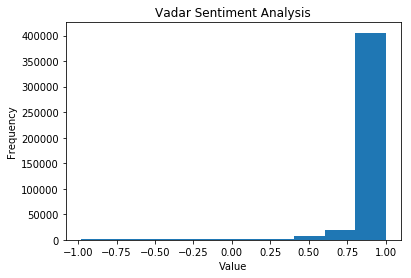

In [84]:
getHistogram('Compound_Score', 'Vadar Sentiment Analysis')

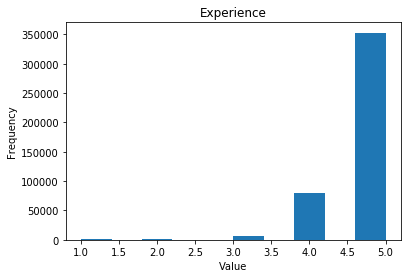

In [82]:
x = finaldf['Ratings'].values
x = finaldf['Hotel_Name'].values
getHistogram('Ratings', 'Experience')

#### Differences
While people experience (1-5 ratings) was quantified, the actual remarks given by the people paint a different story. This is in line with a previous observation, that even when giving a hotel a negative remark, there is some aspect of the review which is a positive remark followed by a "but". Therefore, it is fathomable that hotels with lower ratings would also be given a higher vader score, if their review had some positive comment in it. 

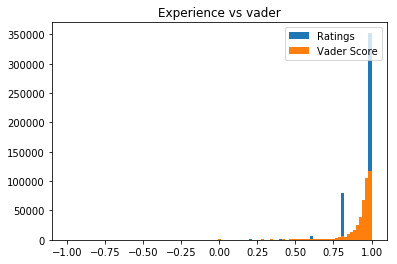

In [87]:
getHistogram('both', 'Experience vs vader')

In [92]:
a = finaldf['Hotel_Name']

#df.sort_values(by='val', ascending=False)

def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

count = count_elements(a)
keys = list(count.keys())
vals = list(count.values())
#count_sorted = sorted(count.values())
type(keys)
data_tuples = list(zip(keys,vals))
count = pd.DataFrame(data_tuples, columns=['Hotel','count'])
count_sorted = count.sort_values(by = ['count'])


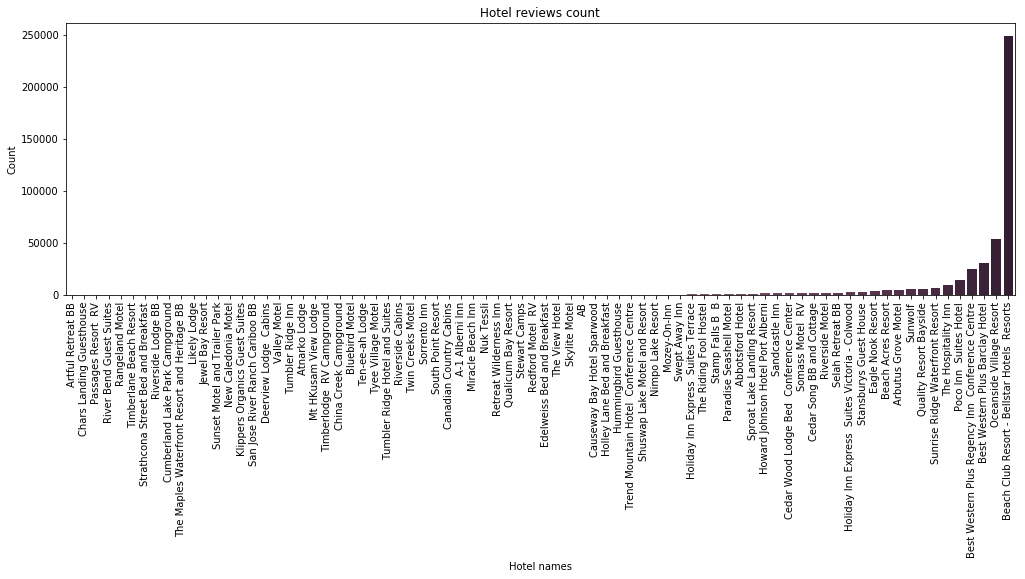

In [93]:
fig, ax = plt.subplots(figsize=(17,5))
plt.setp(plt.xticks()[1], rotation=90)
sns.catplot(x='Hotel', y ='count', palette="ch:.25", kind= 'bar', data=count_sorted, ax = ax);
plt.close(2)
plt.title('Hotel reviews count')
ax.set(xlabel='Hotel names', ylabel='Count')
plt.show()

#### Boxplots for ground truth and vader sentiment:

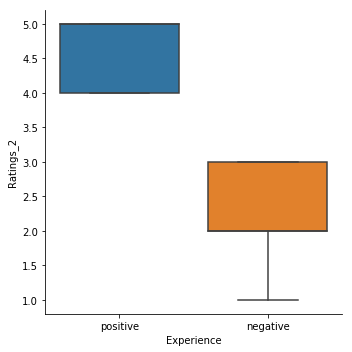

In [94]:
sns.catplot(x="Experience", y="Ratings_2", kind="box", data=reviewDF_graphs);

In [102]:

stansbury_GT = reviewDF[reviewDF.Hotel_Name == 'Stansburys Guest House']
Cedar_Song_GT = reviewDF[reviewDF.Hotel_Name == 'Cedar Song BB and Cottage']
Stamp_Falls_GT = reviewDF[reviewDF.Hotel_Name == 'Stamp Falls B  B']
Mozey_On_Inn_GT = reviewDF[reviewDF.Hotel_Name == 'Mozey-On-Inn']
Nimpo_Lake_GT = reviewDF[reviewDF.Hotel_Name == 'Nimpo Lake Resort']

gt_df1 = pd.concat([stansbury_GT,Cedar_Song_GT],axis = 0)
gt_df2 = pd.concat([gt_df1,Stamp_Falls_GT],axis = 0)
gt_df3 = pd.concat([gt_df2,Mozey_On_Inn_GT],axis = 0)
gt_df4 = pd.concat([gt_df3,Nimpo_Lake_GT],axis = 0)


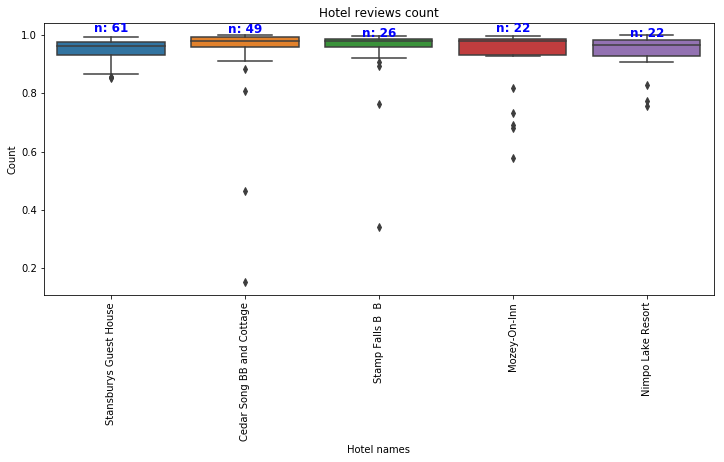

In [104]:
fig, ax = plt.subplots(figsize=(12,5))
plt.setp(plt.xticks()[1], rotation=90)
sns.catplot(x="Hotel_Name", y="Compound_Score", kind="box", data=gt_df4, ax = ax);
plt.close(2)
plt.title('Hotel reviews count')
ax.set(xlabel='Hotel names', ylabel='Count')

# Calculate number of obs per group & median to position labels
medians = gt_df4.groupby(['Hotel_Name'])['Compound_Score'].median().values
nobs = gt_df4['Hotel_Name'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='large', color='b', weight='semibold')



plt.show()

#### Mean and variance of the ground truth and Vader sentiment scores for the  top-5 ranked hotels according to star rating
The mean and the variance for the ground truth was the exact same score - one as all reviews they had gotten were positive. The boxplots for the vader scores were more informative. The variance score is more informative than the mean of the top five hotels. For example, Stamp Falls and Mozey-On-Inn are both highly rated hotels, however Stamp Falls has a higher number of people rated on it and most people had more positive comments to give than in Mozzey-On_Inn. 

#### Variance: 
Vader: 0.010745 <br>
Ratings: 0.0
#### Mean:
Vader: 0.94 <br>
Ratings:1

#### Scatterplots and heatmaps of ground truth score (star ratings) versus vader sentiment score. 

In [108]:
temp = reviews_df['Ratings']
scatterDF = pd.concat([reviewDF,temp],axis = 1)
scatterDF.head()
cols = []
count = 1
for column in scatterDF.columns:
    if column == 'Ratings':
        cols.append('Ratings_'+str(count))
        count+=1
        continue
    cols.append(column)
scatterDF.columns = cols
scatterDF[:2]

,Review,Compound_Score,Experience,Hotel_Name,Exp_Index,Ratings_1,Ratings_2,Ratings_3
0,"""I was looking for a place to sit and chill fo...",0.8442,positive,The Riding Fool Hostel,1,5,NaN,5
1,"""I stayed at the Riding Fool Hostel whilst I w...",0.9965,positive,The Riding Fool Hostel,1,5,NaN,5


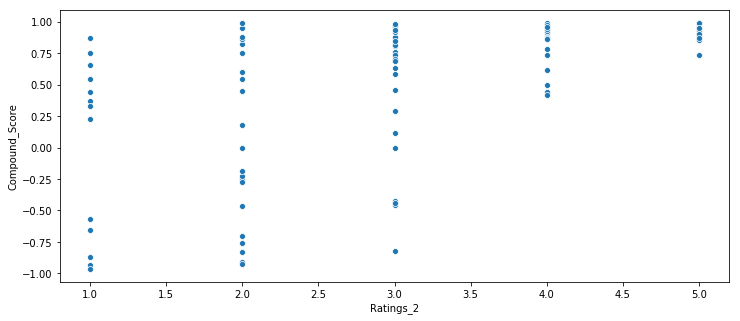

In [107]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.scatterplot(x="Ratings_2", y="Compound_Score", data=scatterDF)

In [114]:
R = scatterDF['Ratings_1'].values
V = scatterDF['Compound_Score'].values
#x, y = np.meshgrid(R, V)
from scipy.stats.kde import gaussian_kde
V

array([0.8442, 0.9965, 0.9757, ..., 0.9524, 0.1655, 0.9363])

In [111]:
#ax3 = sns.heatmap(np.log10(zi.reshape(xi.shape)),cmap=cmap)

In [115]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([V, R]))
xi, yi = np.mgrid[V.min():V.max():V.size**0.5*1j,R.min():R.max():R.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))


Text(0,0.5,'Rating')

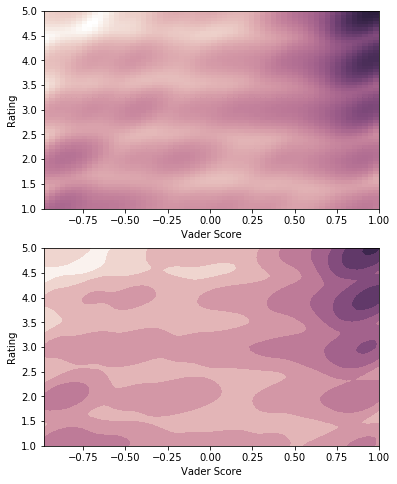

In [116]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(V.min(), V.max())
ax1.set_ylim(R.min(), R.max())
ax2.set_xlim(V.min(), V.max())
ax2.set_ylim(R.min(), R.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

The scatter plot of the ground truth versus vader score was not particularly informative on it own. The only interesting part about it was the for the higher ground through rating, the reviews (dots) were placed in the higher spectrum of the vader score. This idea in combination with the heatplot conveys the same idea, as the top right corner of the graph is a lot darker than the rest of the plot, which goes to show that those ratings had a higher vaderscore and a higher rating. And since we had established earlier, that most of the reviews had a higher vader score, the right half of the heat map is darker as that is the region with the most over lap between the high scores. 

#### Scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score. Each review is a point on the scatterplot.

In [128]:
review = scatterDF['Review']
length = []

for r in review:
    length.append(len(r))
length_df = pd.Series(length) 
scatterDF1 = pd.concat([scatterDF,length_df.rename('length')],axis = 1)
scatterDF1[:2]


,Review,Compound_Score,Experience,Hotel_Name,Exp_Index,Ratings_1,Ratings_2,Ratings_3,length
0,"""I was looking for a place to sit and chill fo...",0.8442,positive,The Riding Fool Hostel,1,5,NaN,5,439
1,"""I stayed at the Riding Fool Hostel whilst I w...",0.9965,positive,The Riding Fool Hostel,1,5,NaN,5,2666


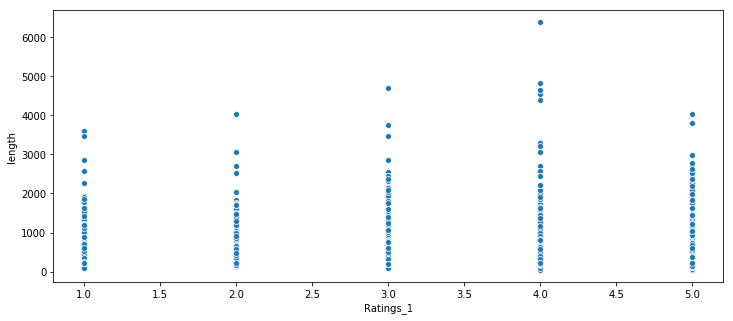

In [119]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.scatterplot(x="Ratings_1", y="length", data=scatterDF1)

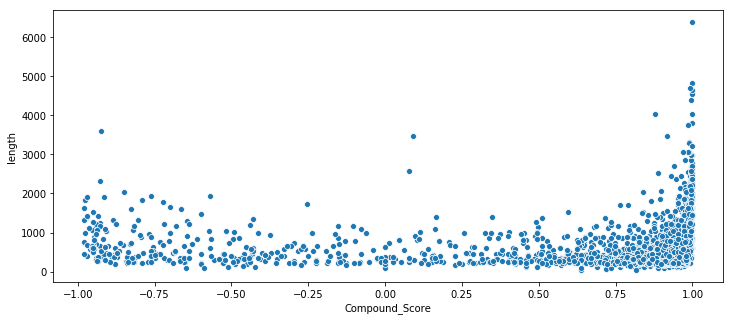

In [121]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.scatterplot(x="Compound_Score", y="length", data=scatterDF1)

In [123]:
x = scatterDF1['length']
y = scatterDF1['Ratings_1']
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0,0.5,'Rating')

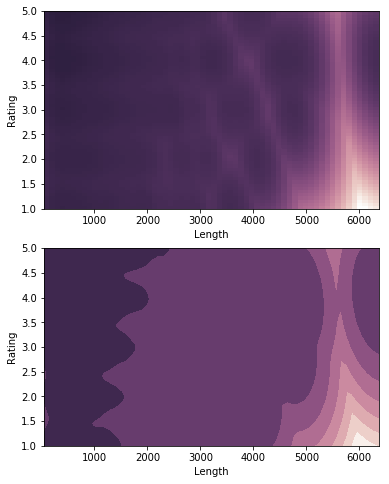

In [124]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Length')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Length')
ax2.set_ylabel('Rating')

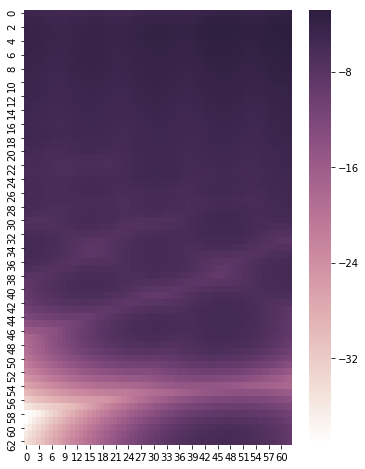

In [125]:
fig = plt.figure(figsize=(6,8))
ax3 = sns.heatmap(np.log10(zi.reshape(xi.shape)),cmap=cmap)

The scatterplot tells us that most reviews are at a lower character length (about 2000 characters or lower) and this is reflected in the heat map, as most the color becomes lighter past review length of 1500 characters. Further more, there are a few tweets of character length 4000 or higher and this is reflected in the small light patch along that character length and review rating of 4. 

In [126]:
x = scatterDF1['length']
y = scatterDF1['vader']
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Vader')

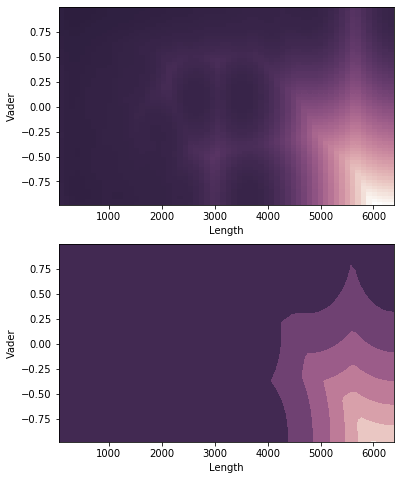

In [127]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Length')
ax1.set_ylabel('Vader')

ax2.set_xlabel('Length')
ax2.set_ylabel('Vader')

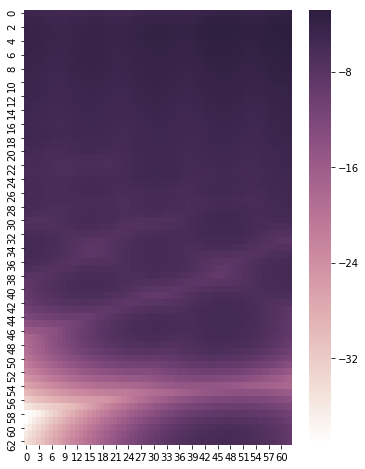

In [126]:
fig = plt.figure(figsize=(6,8))
ax3 = sns.heatmap(np.log10(zi.reshape(yi.shape)),cmap=cmap)

The scatter plot for the vader score was the opposite of the ratings where, the higher the score (more positive) a score, the more characters were used in the review. However the patterns of the vader score match that of the heat plot where the lower the score, the less number of characters were used in the review of the hotel. 

#### Scatterplots of the number of reviews per hotel versus each of average groundtruth score and average Vader sentiment score. In this case, each hotel is a single point on the scatterplot. 

In [142]:
avg_sort =  hotel_performance.sort_values(['Compound_Score'], ascending=[1])

x = list(avg_sort.index)
vad = list(avg_sort['Compound_Score'].values)
exp = list(avg_sort['Exp_Index'].values)
x_DF = pd.DataFrame(x)
df = pd.DataFrame({'average_vader':vad, 'average_exp':exp, 'HotelName': x})


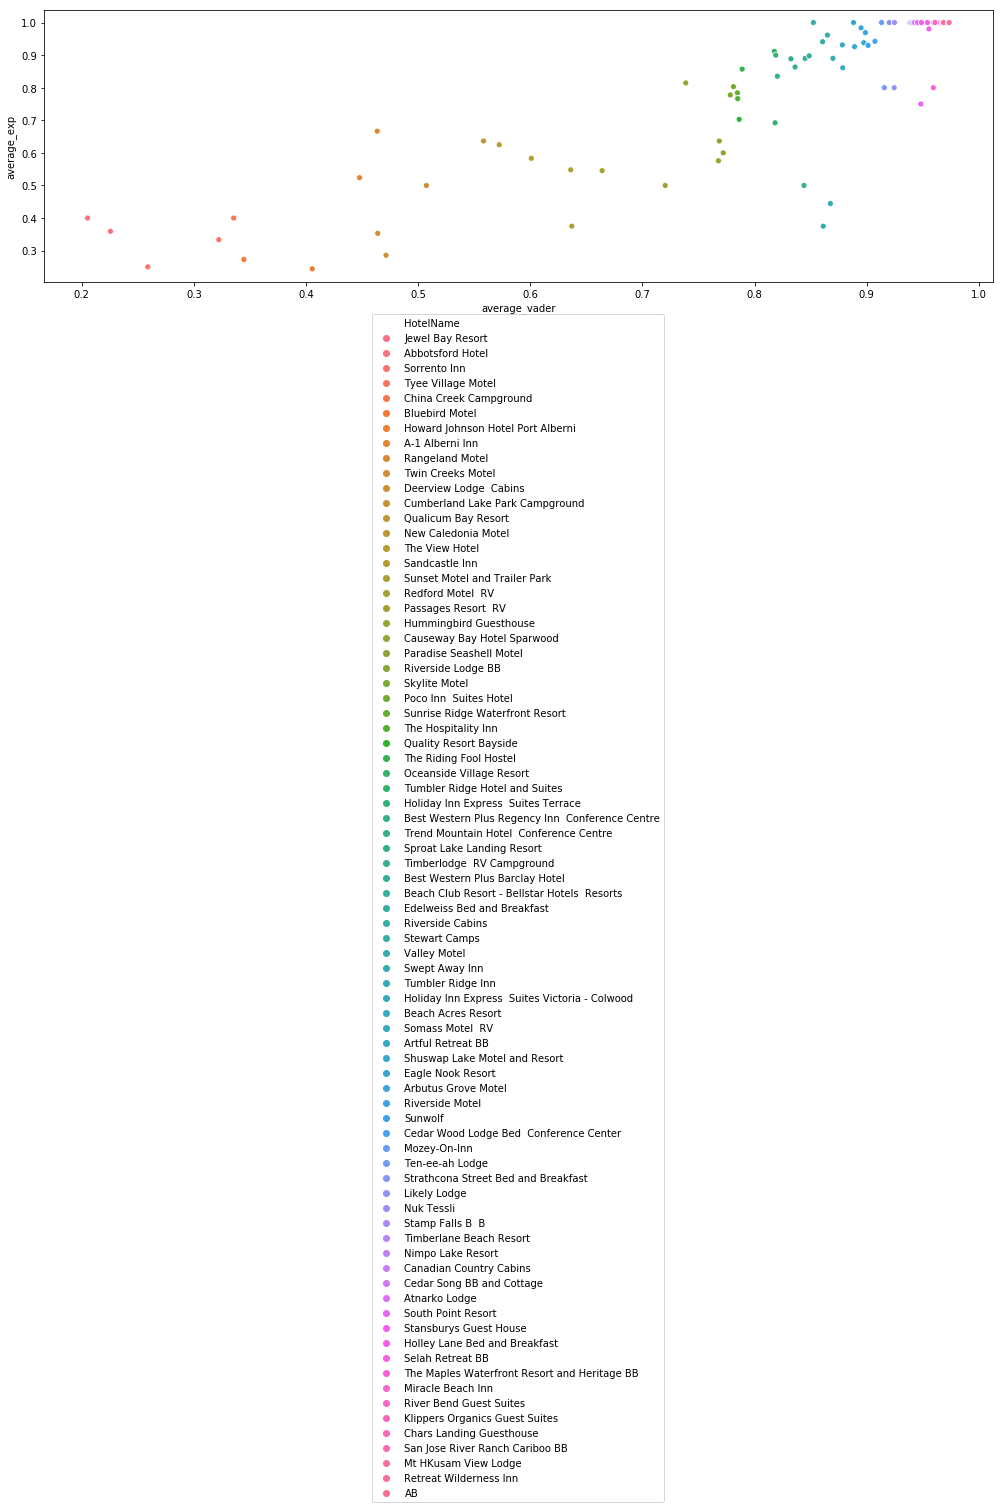

In [144]:
fig, ax = plt.subplots(figsize=(17,5))
ax = sns.scatterplot(x="average_vader", y="average_exp",hue = 'HotelName', data=df)
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

There is a positive linear pattern between the average vader scores and the average ratings per hotel, which suggest that even if the two scores are not linearly connected,they are still however dependent on each other.